In [4]:
import pandas as pd

In [5]:
raw_data=pd.read_csv('C:\\rawData\\개인형 이동장치 수입현황(2019년~2022년 5월, 단위 백만달러).csv',encoding='cp949')

In [6]:
raw_data.columns=["종류","비고","2019년","2020년","2021년","2022년 1~5월"]

In [7]:
raw_data

,종류,비고,2019년,2020년,2021년,2022년 1~5월
0,개인형 이동장치,금액,89.9,131.7,193.7,65.0
1,개인형 이동장치,증감률,25.4,46.5,47.0,33.3
2,개인형 이동장치,비중,100.0,100.0,100.0,100.0
3,전동킥보드,금액,61.0,89.2,111.6,33.9
4,전동킥보드,증감률,7.2,46.2,25.1,45.8
5,전동킥보드,비중,67.9,67.7,57.6,52.1
6,전기자전거,금액,28.9,42.5,82.0,31.1
7,전기자전거,증감률,95.4,47.2,93.0,11.0
8,전기자전거,비중,32.1,32.3,42.4,47.9


In [8]:
pm_data_금액=raw_data[raw_data['비고']=="금액"]
pm_data_금액=pm_data_금액[["종류","2019년","2020년","2021년"]]

In [9]:
# 참고 : 단위는 백만달러
pm_data_금액

,종류,2019년,2020년,2021년
0,개인형 이동장치,89.9,131.7,193.7
3,전동킥보드,61.0,89.2,111.6
6,전기자전거,28.9,42.5,82.0


In [10]:
pm_data_비중=raw_data[raw_data['비고']=="비중"]
pm_data_비중=pm_data_비중[["종류","2019년","2020년","2021년","2022년 1~5월"]]

In [11]:
# 참고 : 단위는 백만달러
pm_data_비중

,종류,2019년,2020년,2021년,2022년 1~5월
2,개인형 이동장치,100.0,100.0,100.0,100.0
5,전동킥보드,67.9,67.7,57.6,52.1
8,전기자전거,32.1,32.3,42.4,47.9


In [12]:
pm_data_금액.T

,0,3,6
종류,개인형 이동장치,전동킥보드,전기자전거
2019년,89.9,61.0,28.9
2020년,131.7,89.2,42.5
2021년,193.7,111.6,82.0


In [13]:
pm_transpose=pm_data_금액.T

In [14]:
pm_transpose

,0,3,6
종류,개인형 이동장치,전동킥보드,전기자전거
2019년,89.9,61.0,28.9
2020년,131.7,89.2,42.5
2021년,193.7,111.6,82.0


In [15]:
pm_transpose.columns=["개인형 이동장치", "전동킥보드", "전기자전거"]

In [16]:
pm_transpose=pm_transpose[1:4]

In [17]:
pm_transpose

,개인형 이동장치,전동킥보드,전기자전거
2019년,89.9,61.0,28.9
2020년,131.7,89.2,42.5
2021년,193.7,111.6,82.0


In [18]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot: >

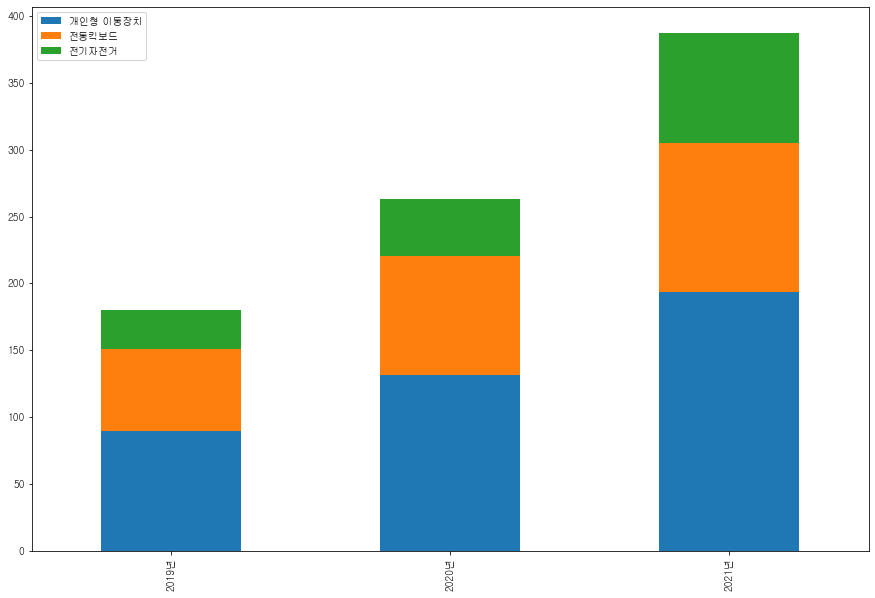

In [19]:
import pandas as pd
pm_transpose.plot(kind="bar",figsize=(15,10),stacked=True)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
pm_transpose.loc['2019년']

개인형 이동장치    89.9
전동킥보드       61.0
전기자전거       28.9
Name: 2019년, dtype: object

In [22]:
year=['2019년','2020년','2021년']

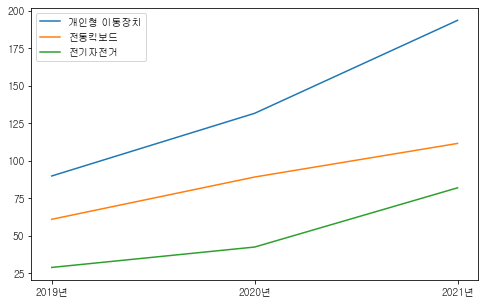

In [23]:
plt.figure(figsize=(8,5))
plt.plot(pm_transpose)
plt.legend(pm_transpose.columns)

In [24]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.ticker as ticker

labels = ['전기자전거', '전동킥보드', '개인형 이동장치']
colors = ['#467373', '#F5B403', '#204796']

mode_size = [8, 8, 8]
line_size = [2, 2, 2]

x_data = np.vstack((np.arange(2019, 2022),)*3)
y_data = np.array([
    [28.9,42.5,82.0],
    [61.0,89.2,111.6],
    [89.9,131.7,193.7],
])

In [25]:
x_data


array([[2019, 2020, 2021],
       [2019, 2020, 2021],
       [2019, 2020, 2021]])

In [26]:
fig = go.Figure()

In [27]:
for i in range(0, 3):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
                            ))
    


In [31]:
fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))
    
fig.update_xaxes(dtick=1)
    
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=160,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {:.1f}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[2],
                                  xanchor='left', yanchor='middle',
                                  text='{:.1f}'.format(y_trace[2]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='단위 : 백만달러 ',
                              font=dict(family='Arial',
                                        size=15,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

In [29]:
pm_data_개인

NameError: name 'pm_data_개인' is not defined

In [ ]:
pm_data_개인=pm_data_금액.query('종류=="개인형 이동장치"')

In [ ]:
pm_data_개인

,종류,2019년,2020년,2021년
0,개인형 이동장치,89.9,131.7,193.7
